Shape of dataset: (187, 15)

Columns: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'Confirmed last week', '1 week change', '1 week % increase', 'WHO Region']

Missing values:
 Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

Top 10 countries with most confirmed cases:
      Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico   

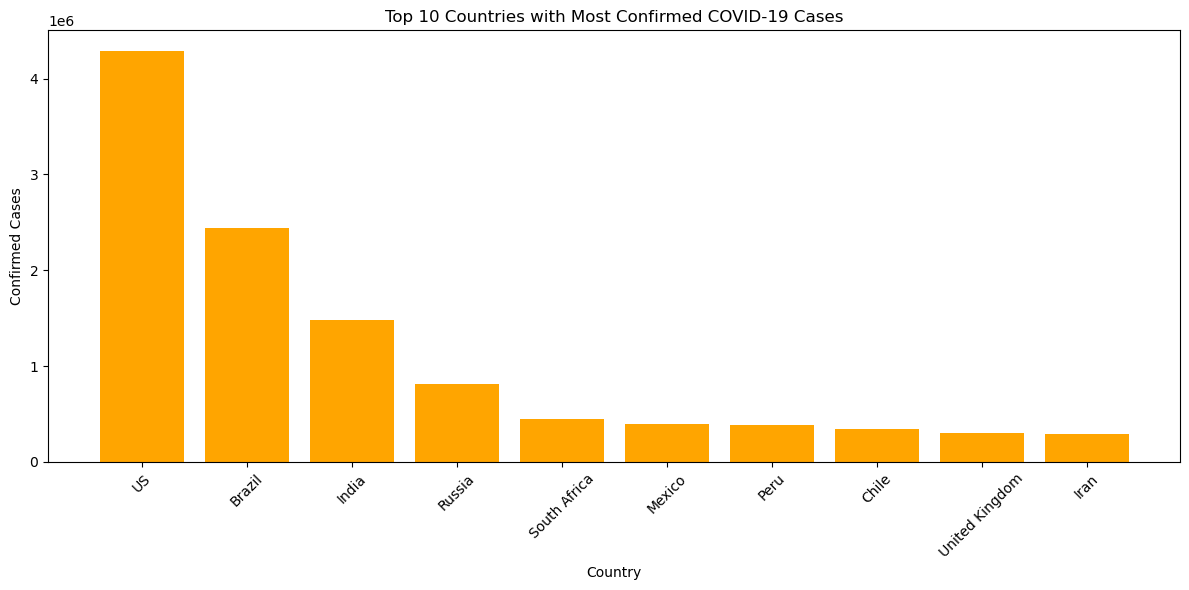

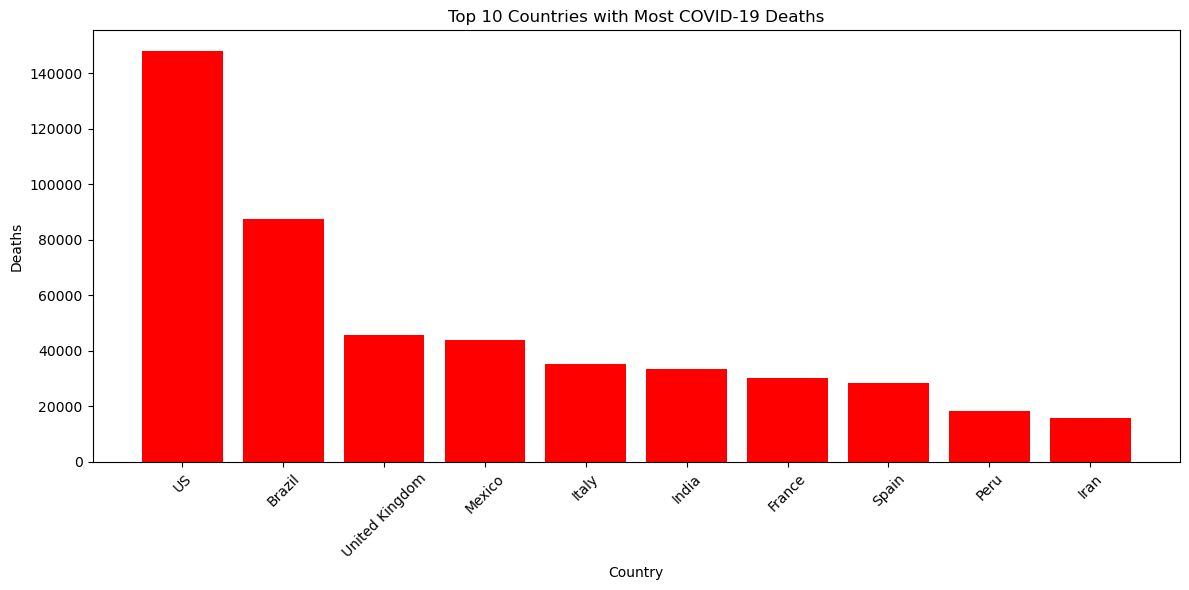

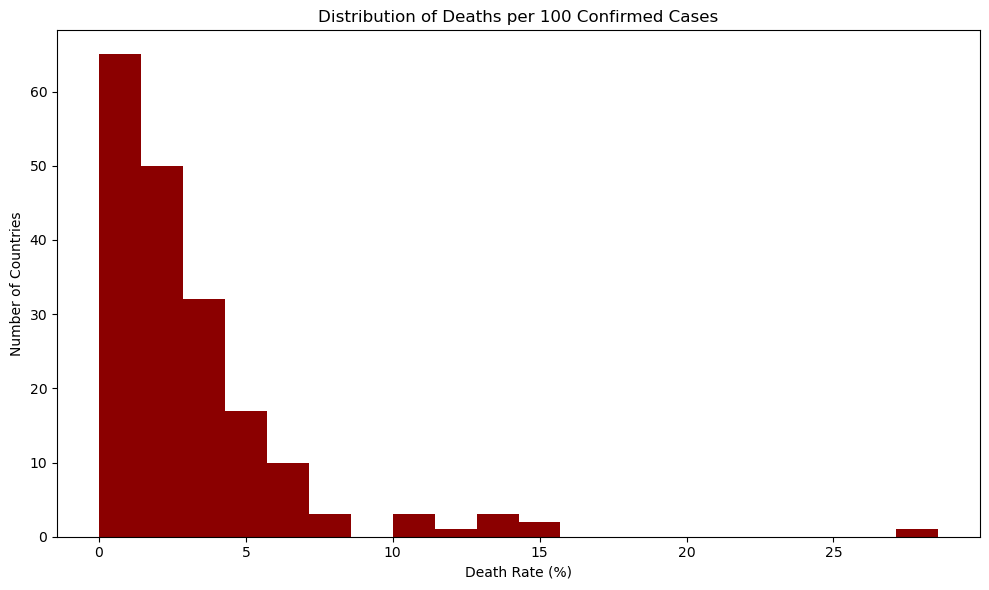

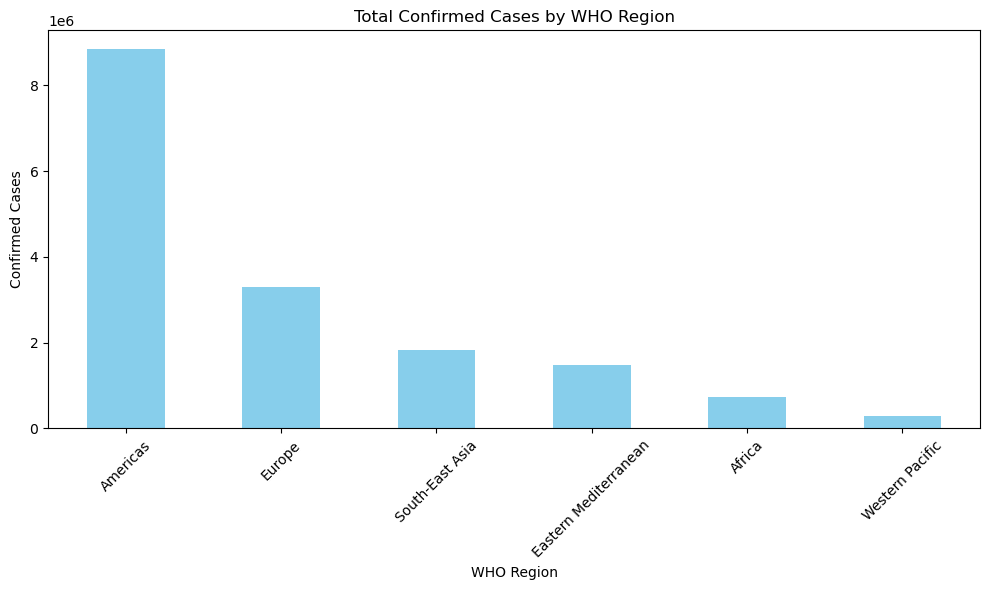

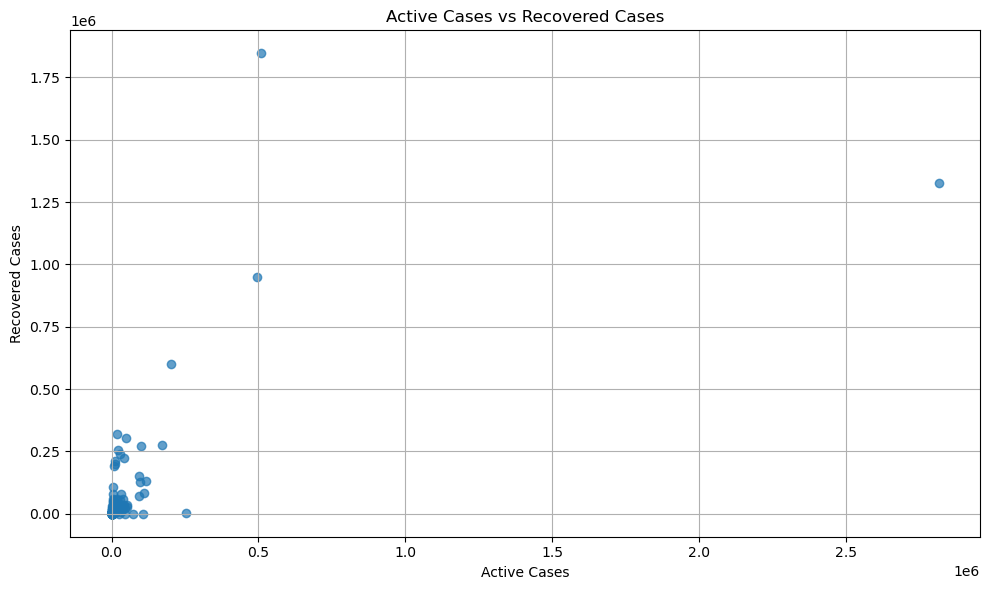


Nepal COVID-19 Stats:
                                     119
Country/Region                    Nepal
Confirmed                         18752
Deaths                               48
Recovered                         13754
Active                             4950
New cases                           139
New deaths                            3
New recovered                       626
Deaths / 100 Cases                 0.26
Recovered / 100 Cases             73.35
Deaths / 100 Recovered             0.35
Confirmed last week               17844
1 week change                       908
1 week % increase                  5.09
WHO Region              South-East Asia


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("country_wise_latest.csv")

# Basic overview
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Top 10 countries with most confirmed cases
top_confirmed = df.sort_values('Confirmed', ascending=False).head(10)
print("\nTop 10 countries with most confirmed cases:\n", top_confirmed[['Country/Region', 'Confirmed']])

# Bar chart - Top 10 confirmed cases
plt.figure(figsize=(12,6))
plt.bar(top_confirmed['Country/Region'], top_confirmed['Confirmed'], color='orange')
plt.title('Top 10 Countries with Most Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 countries with most deaths
top_deaths = df.sort_values('Deaths', ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top_deaths['Country/Region'], top_deaths['Deaths'], color='red')
plt.title('Top 10 Countries with Most COVID-19 Deaths')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Death rate analysis
plt.figure(figsize=(10,6))
plt.hist(df['Deaths / 100 Cases'], bins=20, color='darkred')
plt.title('Distribution of Deaths per 100 Confirmed Cases')
plt.xlabel('Death Rate (%)')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

# WHO Region-wise confirmed cases
region_cases = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_cases.plot(kind='bar', color='skyblue')
plt.title('Total Confirmed Cases by WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Active cases vs recovered
plt.figure(figsize=(10,6))
plt.scatter(df['Active'], df['Recovered'], alpha=0.7)
plt.title('Active Cases vs Recovered Cases')
plt.xlabel('Active Cases')
plt.ylabel('Recovered Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show Nepal stats
nepal = df[df['Country/Region'] == 'Nepal']
print("\nNepal COVID-19 Stats:\n", nepal.T)
